# <font color='#8B0000'>**📊 02_GERMAN_CREDIT**</font>



---
---

# <font color='lightgreen'>✅ Configuracion inicial</font>


En este modelo de datos "German Credit", se busca predecir si un cliente es un buen pagador (0) o un mal pagador (1), se emplea un modelo de clasificación binaria. Durante el entrenamiento, el modelo ajusta sus parámetros mediante el aprendizaje de patrones en datos financieros y crediticios. La función de pérdida cuantifica la discrepancia entre las predicciones y las etiquetas reales, y un umbral de decisión distingue entre las dos clases. El rendimiento del modelo se evalúa en un conjunto de prueba, utilizando métricas como precisión, sensibilidad y especificidad, con el objetivo de proporcionar una herramienta efectiva para la identificación de buenos y malos pagadores en futuros clientes.

## <font color='orange'>🟠 Librerias </font>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, auc, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import class_weight
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings

import warnings

## <font color='orange'>🟠 Maximo de Columnas y Filas </font>



In [ ]:
# Configurar pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## <font color='orange'>🟠 Importamos el Dataset </font>

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPWjtFQ586wQP_drLFrv1lfpL09tF2Ser-mNoePrsJ2ieXETyD9LJobU_S0SHZe42etwOUTnM6P2Wx/pub?output=csv'

df = pd.read_csv(url)

## <font color='orange'>🟠 Renombramos las columnas </font>

In [ ]:
df.columns = ['categoria_cliente', 'estado_cuenta', 'duracion_meses', 'historial_crediticio', 'proposito',
              'monto_credito', 'cuenta_ahorros', 'empleo_actual', 'tasa_cuota', 'estado_sexual',
              'otros_garantes', 'residencia_actual', 'propiedad', 'edad', 'otros_planes_cuotas',
              'vivienda', 'creditos_banco_actual', 'trabajo', 'personas_mantenimiento', 'telefono',
              'trabajador_extranjero']

In [ ]:
df.head(2)

,categoria_cliente,estado_cuenta,duracion_meses,historial_crediticio,proposito,monto_credito,cuenta_ahorros,empleo_actual,tasa_cuota,estado_sexual,otros_garantes,residencia_actual,propiedad,edad,otros_planes_cuotas,vivienda,creditos_banco_actual,trabajo,personas_mantenimiento,telefono,trabajador_extranjero
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


## <font color='orange'>🟠 Informacion de la Data </font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   categoria_cliente       1000 non-null   int64 
 1   estado_cuenta           1000 non-null   object
 2   duracion_meses          1000 non-null   int64 
 3   historial_crediticio    1000 non-null   object
 4   proposito               1000 non-null   object
 5   monto_credito           1000 non-null   int64 
 6   cuenta_ahorros          1000 non-null   object
 7   empleo_actual           1000 non-null   object
 8   tasa_cuota              1000 non-null   int64 
 9   estado_sexual           1000 non-null   object
 10  otros_garantes          1000 non-null   object
 11  residencia_actual       1000 non-null   int64 
 12  propiedad               1000 non-null   object
 13  edad                    1000 non-null   int64 
 14  otros_planes_cuotas     1000 non-null   object
 15  vivie

## <font color='#800080'>🟣 Separamos las variables Numericas y Categoricas</font>

In [ ]:
# Separar columnas categóricas y numéricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
columnas_numericas = df.select_dtypes(exclude=['object']).columns


# <font color='lightgreen'>✅ Configuracion Previa al Modelo </font>

## <font color='lightgreen'>🟢 Obtenmos Dummies de Columnas categoricas</font>


In [ ]:
columnas_categoricas

Index(['estado_cuenta', 'historial_crediticio', 'proposito', 'cuenta_ahorros',
       'empleo_actual', 'estado_sexual', 'otros_garantes', 'propiedad',
       'otros_planes_cuotas', 'vivienda', 'trabajo', 'telefono',
       'trabajador_extranjero'],
      dtype='object')

In [ ]:
def obtener_dummies (columna):
  global df

  # Obtener variables dummy y eliminar la primera columna
  df_dummies = pd.get_dummies(df[columna], prefix=columna, drop_first=True)

  # Concatenar las variables dummy al DataFrame original
  df = pd.concat([df, df_dummies], axis=1)

  # Eliminar la columna original 'Ciudad'
  df = df.drop(columna, axis=1)

In [ ]:
for i in columnas_categoricas:
  obtener_dummies(i)


In [ ]:
df.head(2)

,categoria_cliente,duracion_meses,monto_credito,tasa_cuota,residencia_actual,edad,creditos_banco_actual,personas_mantenimiento,estado_cuenta_< 0 DM,estado_cuenta_>= 200 DM / salary assignments for at least 1 year,estado_cuenta_no checking account,historial_crediticio_critical account/ other credits existing (not at this bank),historial_crediticio_delay in paying off in the past,historial_crediticio_existing credits paid back duly till now,historial_crediticio_no credits taken/ all credits paid back duly,proposito_business,proposito_car (new),proposito_car (used),proposito_domestic appliances,proposito_education,proposito_furniture/equipment,proposito_radio/television,proposito_repairs,proposito_retraining,cuenta_ahorros_... < 100 DM,cuenta_ahorros_100 <= ... < 500 DM,cuenta_ahorros_500 <= ... < 1000 DM,cuenta_ahorros_unknown/ no savings account,empleo_actual_... < 1 year,empleo_actual_1 <= ... < 4 years,empleo_actual_4 <= ... < 7 years,empleo_actual_unemployed,estado_sexual_male : divorced/separated,estado_sexual_male : married/widowed,estado_sexual_male : single,otros_garantes_guarantor,otros_garantes_none,"propiedad_if not A121/A122 : car or other, not in attribute 6",propiedad_real estate,propiedad_unknown / no property,otros_planes_cuotas_none,otros_planes_cuotas_stores,vivienda_own,vivienda_rent,trabajo_skilled employee / official,trabajo_unemployed/ unskilled - non-resident,trabajo_unskilled - resident,"telefono_yes, registered under the customers name",trabajador_extranjero_yes
0,0,6,1169,4,4,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


## <font color='lightgreen'>🟢 Escalamos Columnas Numericas</font>


In [ ]:
columnas_numericas

Index(['categoria_cliente', 'duracion_meses', 'monto_credito', 'tasa_cuota',
       'residencia_actual', 'edad', 'creditos_banco_actual',
       'personas_mantenimiento'],
      dtype='object')

In [ ]:
# Seleccionar las columnas que deseas escalar
columnas_a_escalar = columnas_numericas[1:]

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Escalar las columnas seleccionadas y reemplazar los valores en el DataFrame
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

df.head(2)

,categoria_cliente,duracion_meses,monto_credito,tasa_cuota,residencia_actual,edad,creditos_banco_actual,personas_mantenimiento,estado_cuenta_< 0 DM,estado_cuenta_>= 200 DM / salary assignments for at least 1 year,estado_cuenta_no checking account,historial_crediticio_critical account/ other credits existing (not at this bank),historial_crediticio_delay in paying off in the past,historial_crediticio_existing credits paid back duly till now,historial_crediticio_no credits taken/ all credits paid back duly,proposito_business,proposito_car (new),proposito_car (used),proposito_domestic appliances,proposito_education,proposito_furniture/equipment,proposito_radio/television,proposito_repairs,proposito_retraining,cuenta_ahorros_... < 100 DM,cuenta_ahorros_100 <= ... < 500 DM,cuenta_ahorros_500 <= ... < 1000 DM,cuenta_ahorros_unknown/ no savings account,empleo_actual_... < 1 year,empleo_actual_1 <= ... < 4 years,empleo_actual_4 <= ... < 7 years,empleo_actual_unemployed,estado_sexual_male : divorced/separated,estado_sexual_male : married/widowed,estado_sexual_male : single,otros_garantes_guarantor,otros_garantes_none,"propiedad_if not A121/A122 : car or other, not in attribute 6",propiedad_real estate,propiedad_unknown / no property,otros_planes_cuotas_none,otros_planes_cuotas_stores,vivienda_own,vivienda_rent,trabajo_skilled employee / official,trabajo_unemployed/ unskilled - non-resident,trabajo_unskilled - resident,"telefono_yes, registered under the customers name",trabajador_extranjero_yes
0,0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1


## <font color='lightgreen'>🟢 Separamos la data de Entrenamiento y Testeo</font>


In [ ]:
# separar X e y
X = df.drop("categoria_cliente", axis=1)
y = df['categoria_cliente']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## <font color='lightgreen'>🟢 Tratamos la Data Desbalanceada</font>


In [ ]:
# Aplica TomekLinks solo al conjunto de entrenamiento
tomek_links = TomekLinks()
X_train, y_train = tomek_links.fit_resample(X_train, y_train)


In [ ]:
def metricas(y_test, y_pred, modelo):
  # Metricas y matriz de confusión
  print(modelo)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'accuracy: {accuracy:.2f}')

  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))


# <font color='lightblue'>☑️ Modelo Maquina de Soporte vectorial</font>


## <font color='lightblue'>🔵 Modelo SVC </font>

In [ ]:
# Crear el modelo SVM
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_svc = model_svc.predict(X_test)

# Obtener los índices de los vectores de soporte
support_indices = model_svc.support_

# Obtener los vectores de soporte
support_vectors = X_train.iloc[support_indices]


## <font color='lightblue'>🔵 Metricas Modelo SVC </font>


In [ ]:
# Metricas y matriz de confusión
metricas(y_test=y_test, y_pred=y_pred_svc, modelo="SVC")

SVC
accuracy: 0.79
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       141
           1       0.64      0.61      0.63        59

    accuracy                           0.79       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200

[[121  20]
 [ 23  36]]


## <font color='lightblue'>🔵 Top Importancia feature Modelo SVC </font>

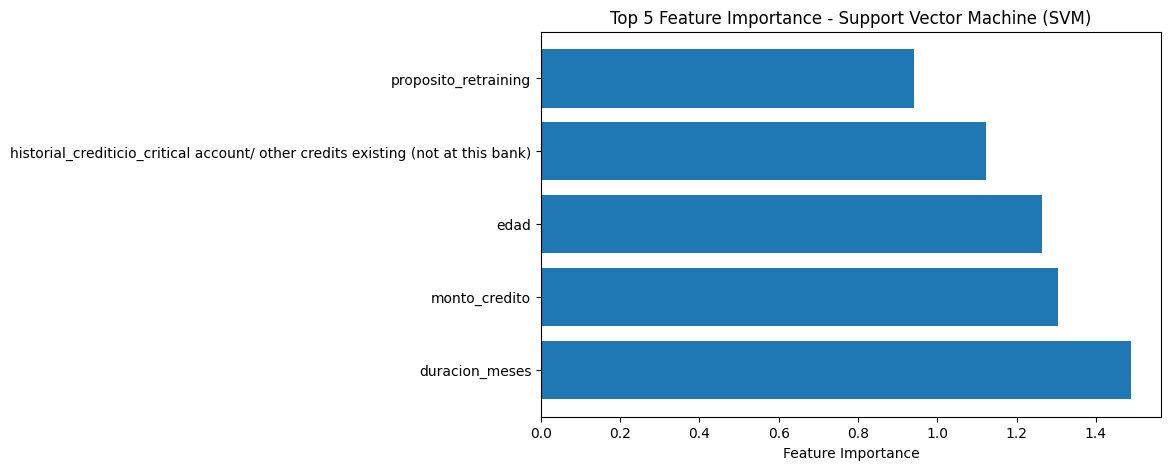

In [ ]:
# Visualizar la importancia relativa de las características en los vectores de soporte
feature_importance = np.abs(model_svc.coef_[0])
sorted_indices = np.argsort(feature_importance)[::-1]
top_features = X_train.columns[sorted_indices[:5]]

plt.figure(figsize=(8,5))
plt.barh(top_features, feature_importance[sorted_indices[:5]])
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importance - Support Vector Machine (SVM)')
plt.show()

# <font color='lightblue'>☑️ Modelo Regresion Logistica</font>

## <font color='lightblue'>🔵 Modelo LogisticRegression </font>

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

## <font color='lightblue'>🔵 Metricas Modelo LogisticRegression </font>

In [ ]:
# Metricas y matriz de confusión
metricas(y_test=y_test, y_pred=y_pred_lr, modelo="LogisticRegression")

LogisticRegression
accuracy: 0.80
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.68      0.61      0.64        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.80      0.80      0.80       200

[[124  17]
 [ 23  36]]


## <font color='lightblue'>🔵 Curva ROC Modelo LogisticRegression </font>

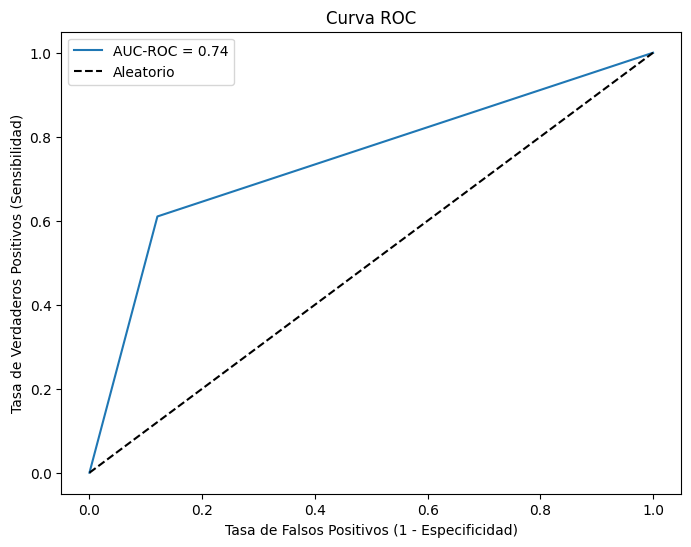

In [ ]:
# Calcula el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_lr)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend()
plt.show()

## <font color='lightblue'>🔵 Top importancia Feature Modelo LogisticRegression </font>

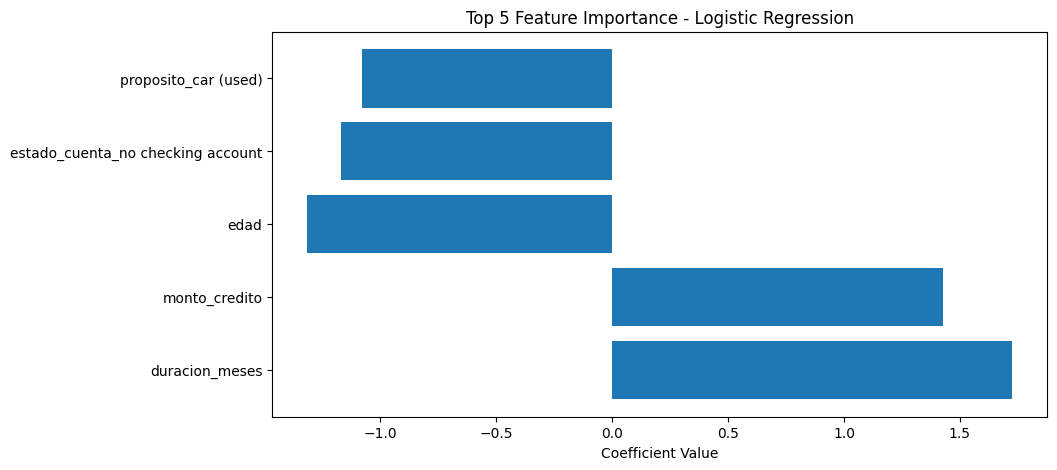

In [ ]:
# DataFrame con las columnas y sus coeficientes
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model_lr.coef_[0]})

# Ordenar el DataFrame por valor absoluto de los coeficientes en orden descendente
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Filtrar las 5 características más importantes
top_features = coef_df.head(5)

# Visualizar las 5 características más importantes
plt.figure(figsize=(10, 5))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 5 Feature Importance - Logistic Regression')
plt.show()

# <font color='lightblue'>☑️ Modelo Regresion Logistica con Hiperparametros</font>

## <font color='lightblue'>🔵 Modelo LogisticRegression </font>

In [ ]:
# Desactivar las advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Modelo
model_lr = LogisticRegression()

# GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con búsqueda de cuadrícula en datos normalizados
grid_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Predecir con el modelo ajustado en datos de prueba normalizados
y_pred_lr = grid_search.predict(X_test_scaled)


Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}


## <font color='lightblue'>🔵 Metricas Modelo LogisticRegression </font>

In [ ]:
# Metricas y matriz de confusión
metricas(y_test=y_test, y_pred=y_pred_lr, modelo="LogisticRegression")

LogisticRegression
accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       141
           1       0.68      0.47      0.56        59

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.77      0.78      0.77       200

[[128  13]
 [ 31  28]]


## <font color='lightblue'>🔵 Top Importancia Feature Modelo LogisticRegression </font>

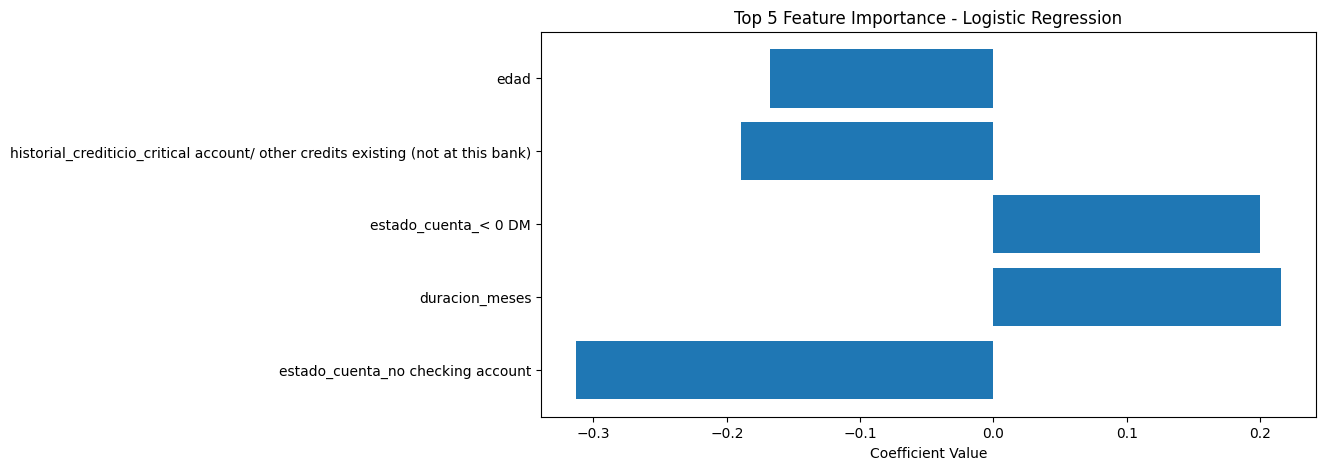

In [ ]:
# DataFrame con las columnas originales y los datos normalizados
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Mejor modelo después de la búsqueda de cuadrícula
best_model = grid_search.best_estimator_

# DataFrame con las columnas y sus coeficientes
coef_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Coefficient': best_model.coef_[0]})

# DataFrame por valor absoluto de los coeficientes en orden descendente
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Filtrar las 5 características más importantes
top_features = coef_df.head(5)

# plot 5 características más importantes
plt.figure(figsize=(10, 5))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 5 Feature Importance - Logistic Regression')
plt.show()


# <font color='lightblue'>☑️ Modelo Arbol de Decicion </font>

## <font color='lightblue'>🔵 Modelo tree_model </font>

In [ ]:
# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

## <font color='lightblue'>🔵 Metricas Modelo tree_model </font>


In [ ]:
# Metricas y matriz de confusión
metricas(y_test=y_test, y_pred=y_pred_tree, modelo="DecisionTreeClassifier")

DecisionTreeClassifier
accuracy: 0.76
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200

[[128  13]
 [ 35  24]]


## <font color='lightblue'>🔵 Plot Modelo tree_model </font>


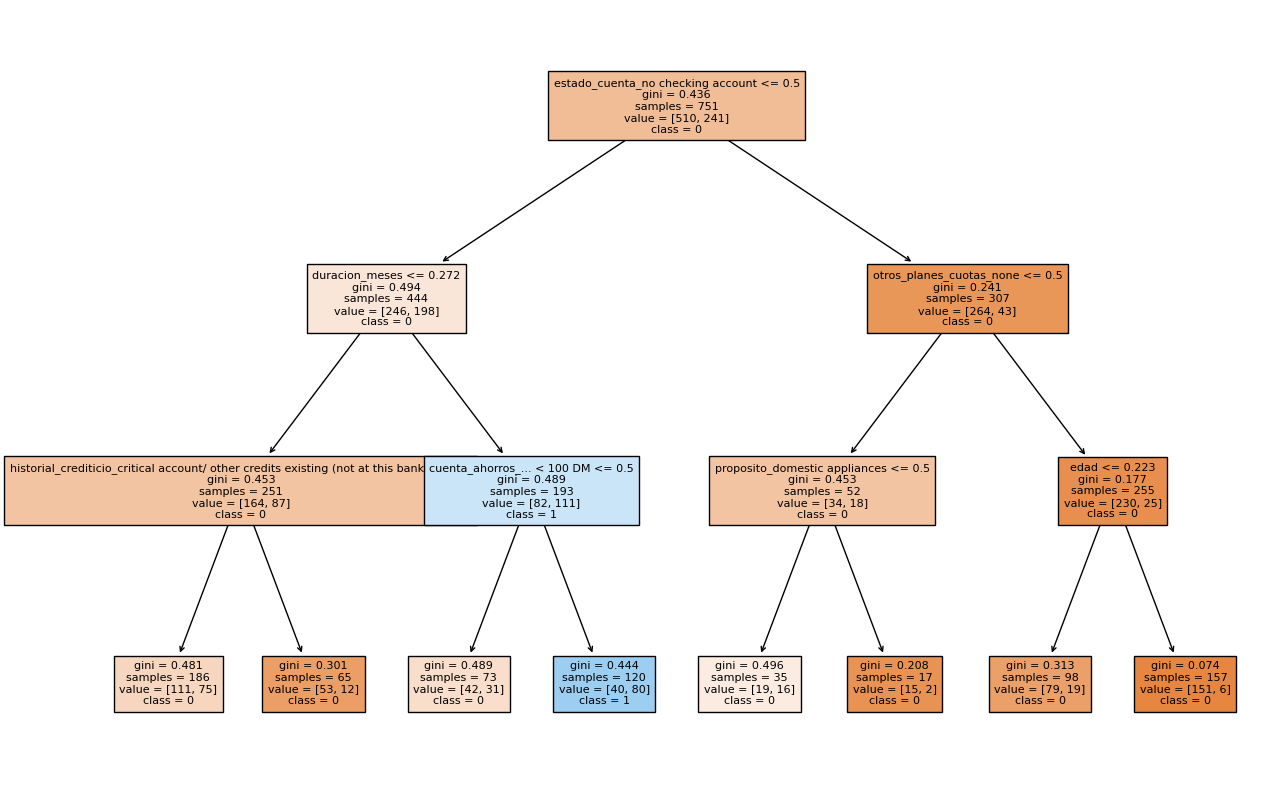

In [ ]:
# Plot árbol de decisión utilizando plot_tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=list(X.columns), class_names=list(map(str, tree_model.classes_)), fontsize=8)
plt.show()

# <font color='lightgreen'>✅ Comparacion de Modelos de Clsificacion </font>

## <font color='orange'>🟠 Metricas Para ambas Clases (0, 1) </font>

In [ ]:
# Función metricas
def mericas_2(y_test, y_pred, modelo):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    metricas_dict = {
        'modelo': modelo,
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'confusion_matrix': cm
    }

    return metricas_dict

# Métricas para cada modelo
metricas_svc = mericas_2(y_test, y_pred_svc, 'SVM')
metricas_lr = mericas_2(y_test, y_pred_lr, 'Regresión Logística')
metricas_tree = mericas_2(y_test, y_pred_tree, 'Árbol de Decisión')


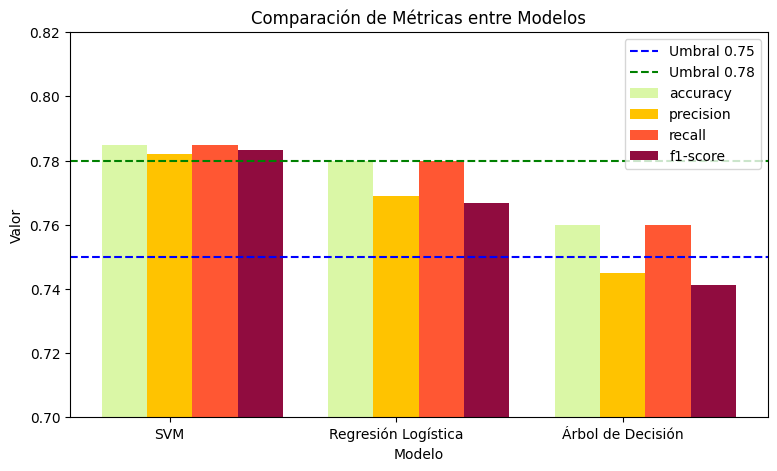

In [ ]:
# Tamaño grafico
fig, ax = plt.subplots(figsize=(9, 5))

# Gráfica de barras agrupadas
modelos = ['SVM', 'Regresión Logística', 'Árbol de Decisión']
metricas_nombres = ['accuracy', 'precision', 'recall', 'f1-score']

# Paleta de colores
colores = ['#DAF7A6', '#FFC300', '#FF5733', '#900C3F']

bar_width = 0.2
index = np.arange(len(modelos))

for i, metrica in enumerate(metricas_nombres):
    valores = [metricas_svc[metrica], metricas_lr[metrica], metricas_tree[metrica]]
    plt.bar(index + i * bar_width, valores, bar_width, label=metrica, color=colores[i])

# Umbral
plt.axhline(y=0.75, color='b', linestyle='--', label='Umbral 0.75')
plt.axhline(y=0.78, color='g', linestyle='--', label='Umbral 0.78')

plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(index + bar_width, modelos)
plt.legend()

# Límites del eje y zoom en la parte superior
plt.ylim(0.7, 0.82)

plt.show()


## <font color='orange'>🟠 Metricas Para la Clase 0 </font>

In [ ]:
# Función metricas clase 0
def metricas_clase_0(y_test, y_pred, modelo):
    report = classification_report(y_test, y_pred, output_dict=True)

    metricas_dict = {
        'modelo': modelo,
        'precision': report['0']['precision'],
        'recall': report['0']['recall'],
        'f1-score': report['0']['f1-score'],
    }

    return metricas_dict

# Métricas para cada modelo
metricas_svc = metricas_clase_0(y_test, y_pred_svc, 'SVM')
metricas_lr = metricas_clase_0(y_test, y_pred_lr, 'Regresión Logística')
metricas_tree = metricas_clase_0(y_test, y_pred_tree, 'Árbol de Decisión')

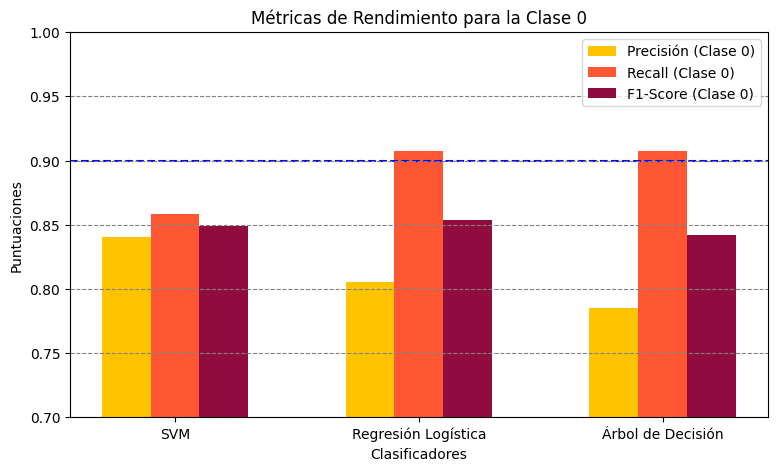

In [ ]:
# Metricas para la clase 0
clasificadores = [metricas_svc['modelo'], metricas_lr['modelo'], metricas_tree['modelo']]
metricas_clase_0 = {
    'Precisión (Clase 0)': [metricas_svc['precision'], metricas_lr['precision'], metricas_tree['precision']],
    'Recall (Clase 0)': [metricas_svc['recall'], metricas_lr['recall'], metricas_tree['recall']],
    'F1-Score (Clase 0)': [metricas_svc['f1-score'], metricas_lr['f1-score'], metricas_tree['f1-score']]
}

# Configuración del gráfico
ancho_barras = 0.2
indice = np.arange(len(clasificadores))
colores = ['#FFC300', '#FF5733', '#900C3F']

# Tamaño grafico
fig, ax = plt.subplots(figsize=(9, 5))

for i, (nombre_metrica, valores) in enumerate(metricas_clase_0.items()):
    ax.bar(indice + i * ancho_barras, valores, ancho_barras, label=nombre_metrica, color=colores[i])

# Etiquetas y leyendas
ax.set_xlabel('Clasificadores')
ax.set_ylabel('Puntuaciones')
ax.set_title('Métricas de Rendimiento para la Clase 0')
ax.set_xticks(indice + (len(metricas_clase_0) - 1) * ancho_barras / 2)
ax.set_xticklabels(clasificadores)
ax.legend()

# Límites del eje y y zoom en la parte superior
plt.ylim(0.7, 1)

# Umbral
plt.axhline(y=0.90, color='b', linestyle='--', label='Umbral 0.90')

# Líneas horizontales para cada marca del eje y
for marca_y in ax.get_yticks():
    ax.axhline(y=marca_y, color='gray', linestyle='--', linewidth=0.8)

plt.show()


# <font color='lightgreen'>✅ Conclusiones </font>

+ Al analizar las métricas de ambos modelos, se destaca la superioridad del modelo de Máquina de Soporte Vectorial (SVM). No obstante, al profundizar en la precisión de la predicción para la Clase 0, observamos que el modelo de Regresión Logística sobresale, superando al SVM.

+ Dado nuestro objetivo primordial de identificar adecuadamente a los potenciales buenos clientes, es crucial priorizar la predicción precisa de la Clase 0. En este contexto, la Regresión Logística muestra un rendimiento más sólido en comparación con el Árbol de Decisión para ambas métricas evaluadas.

+ Por lo tanto, la elección se inclina hacia el modelo de Regresión Logística, ya que, en términos generales, demuestra el mejor desempeño, especialmente en la clasificación precisa de la Clase 0. Esta decisión se alinea con nuestro objetivo principal de identificar a los clientes que son buenos pagadores, priorizando así la inclusión de estos en nuestro banco.